#### Para Importación de Bibliotecas

In [1]:
# import (nombre de bublioteca) as pd: Importa la biblioteca y le asigna el alias pd.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Leer archivo TSV
data = pd.read_csv('/home/melani/git/project_bioinformatics/seq_project/resultados.tsv', sep='\t', header=None)
# sep='\t': Especifica que los datos están separados por tabulaciones.
# header=None: Indica que el archivo no tiene una fila de encabezado.
# names=[...]: Proporciona los nombres de las columnas manualmente.

In [5]:
# Asignar nombres a las columnas
data.columns = ['Query_ID', 'Subject_ID', 'Perc_Identity', 'Alignment_Length', 'Mismatches', 'Gap_Opens', 'Query_Start', 'Query_End', 'Subject_Start', 'Subject_End', 'E_Value', 'Bit_Score']

In [6]:
# Ver los primeros registros
print(data.head())

                                       Query_ID  \
0  beta_lactamase|EU885954.1|larval_midguts|CAR   
1  beta_lactamase|EU885954.1|larval_midguts|CAR   
2  beta_lactamase|EU885954.1|larval_midguts|CAR   
3  beta_lactamase|EU885954.1|larval_midguts|CAR   
4  beta_lactamase|EU885954.1|larval_midguts|CAR   

                                          Subject_ID  Perc_Identity  \
0       beta_lactamase|EU885954.1|larval_midguts|CAR          100.0   
1  beta_lactamase|KU606014.1|Preterm_infant_stool...           60.9   
2          beta_lactamase|KF791056.1|retail_host|AMP           51.9   
3   beta_lactamase|GQ343005.1|human_fecal_matter|AMX           54.3   
4          beta_lactamase|KX125365.1|newborn_gut|PIP           56.7   

   Alignment_Length  Mismatches  Gap_Opens  Query_Start  Query_End  \
0               299           0          0            1        299   
1               266         102          2           28        293   
2               289         137          2            5 

In [7]:
# Configuración de gráficos
sns.set(style='whitegrid') # establecer las configuraciones predeterminadas del gráfico en términos de estilo y contexto.
# 'whitegrid': Este estilo agrega un fondo blanco con una cuadrícula ligera, lo que ayuda a mejorar la legibilidad de los gráficos.

#### Histograma de porcentaje de identidad

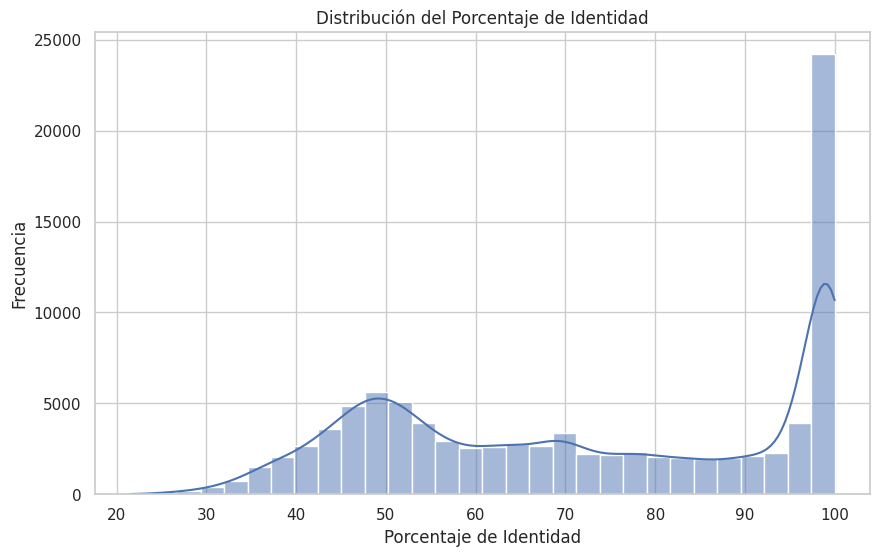

In [8]:
# Histograma del porcentaje de identidad
plt.figure(figsize=(10, 6)) #Crea y define el tamaño de la figura.
sns.histplot(data['Perc_Identity'], bins=30, kde=True) # Crea el histograma del porcentaje de identidad con 30 bins y añade una curva de densidad.
plt.title('Distribución del Porcentaje de Identidad') #Añade un título al gráfico.
plt.xlabel('Porcentaje de Identidad') # Etiqueta el eje X.
plt.ylabel('Frecuencia') # Etiqueta el eje Y.
plt.show() # Muestra el gráfico en la pantalla.

 #### Grafico de dispersión E-Value vs. Bit Score

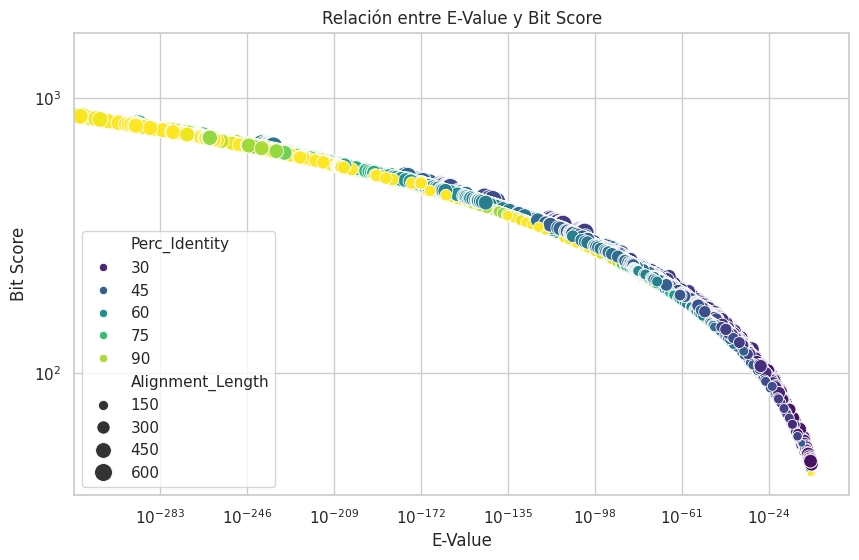

In [9]:
# Gráfico de dispersión E-Value vs. Bit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='E_Value', y='Bit_Score', data=data, hue='Perc_Identity', palette='viridis', size='Alignment_Length', sizes=(20, 200)) 
# hue: especifica qué variable se debe usar para mapear los colores de los puntos en el gráfico.
# palette: especifica la paleta de colores que se debe usar para los puntos en el gráfico.
# 'viridis': nombre de una paleta de colores predefinida que va del azul al amarillo.
# size: especifica qué variable se debe usar para mapear el tamaño de los puntos en el gráfico.
# sizes: define el rango de tamaños para los puntos en el gráfico.
plt.title('Relación entre E-Value y Bit Score')
plt.xlabel('E-Value')
plt.ylabel('Bit Score')
plt.xscale('log') # Establece una escala logarítmica para ambos ejes para mejorar la legibilidad.
plt.yscale('log')
plt.show()

##### Gráfico de Barras Apiladas para mostrar la cantidad de alineamientos de diferentes genes de resistencia por su origen

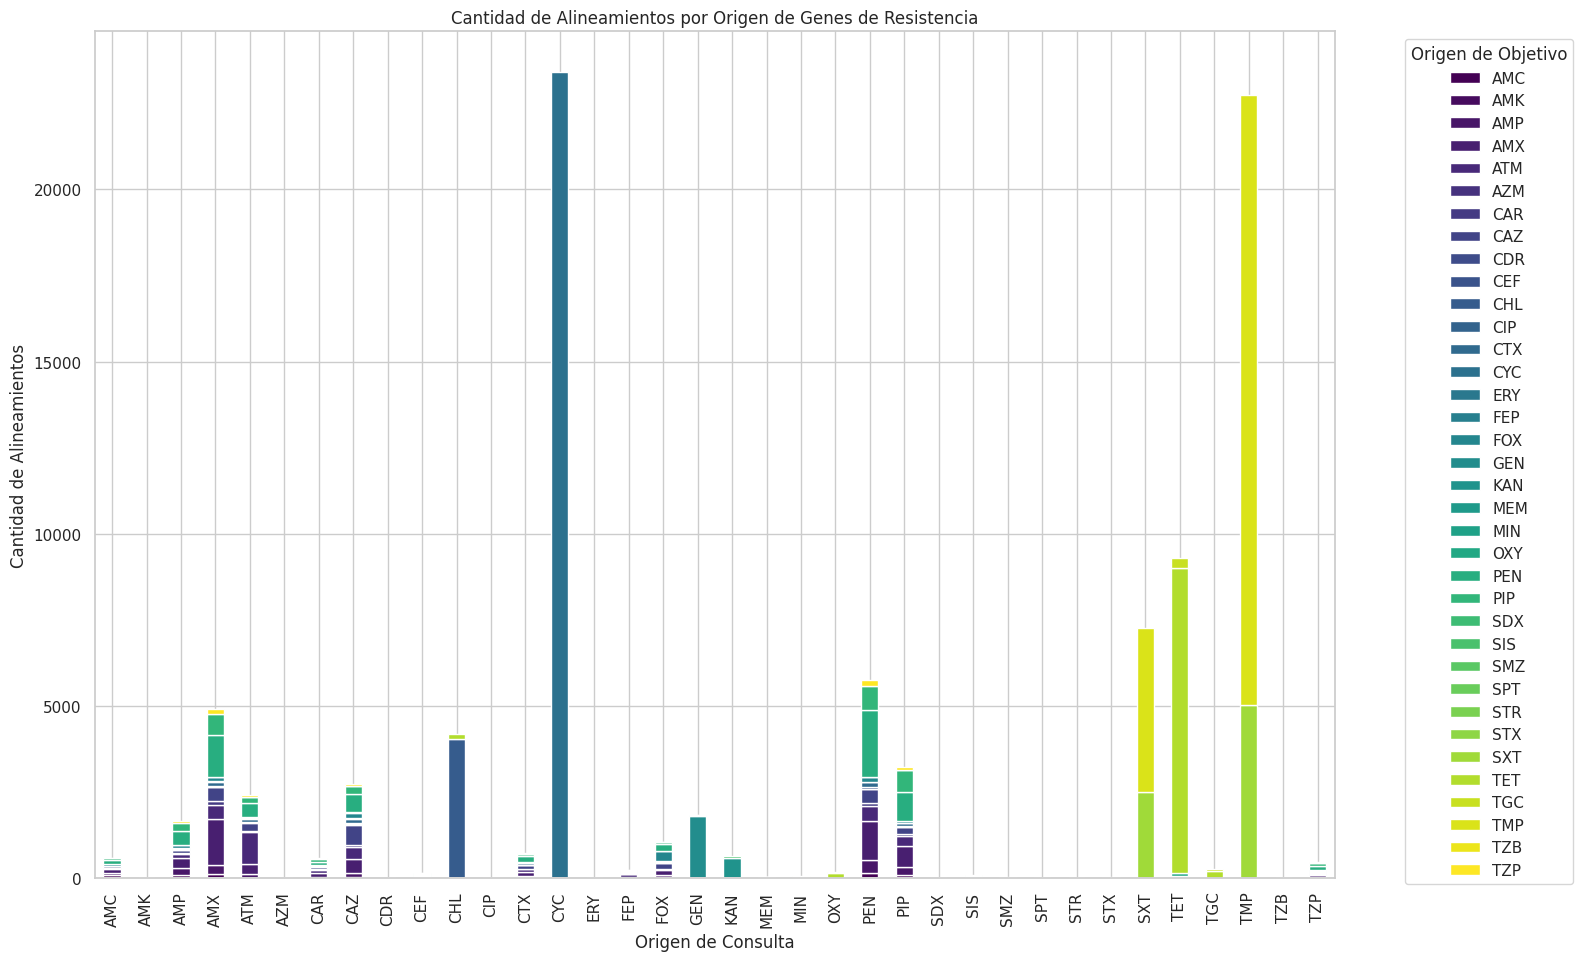

In [ ]:
# Extraer origen de consulta y objetivo
data['Query_Origin'] = data['Query_ID'].apply(lambda x: x.split('|')[-1])
data['Subject_Origin'] = data['Subject_ID'].apply(lambda x: x.split('|')[-1])
# data['Query_Origin']: Crea una nueva columna en el DataFrame data llamada Query_Origin.
# apply(lambda x: x.split('|')[-1]): Aplica una función lambda a cada valor en la columna Query_ID.
# x.split('|'): Divide cada valor en Query_ID en una lista utilizando el carácter '|' como separador.
# [-1]: Selecciona el último elemento de la lista (después del último separador |), que representa el origen del gen de consulta.
# Crear datos apilados
stacked_data = data.groupby(['Query_Origin', 'Subject_Origin']).size().unstack()
# data.groupby(['Query_Origin', 'Subject_Origin']): Agrupa los datos por las columnas Query_Origin y Subject_Origin.
# size(): Cuenta el número de ocurrencias en cada grupo.
# unstack(): crea una tabla donde cada celda representa el número de alineamientos entre un origen de consulta y un origen de objetivo.
# Crear gráfico de barras apiladas
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(16, 11), colormap='viridis')
# kind='bar': Especifica que el gráfico debe ser de barras.
# stacked=True: Indica que las barras deben ser apiladas.
plt.title('Cantidad de Alineamientos por Origen de Genes de Resistencia')
plt.xlabel('Origen de Consulta')
plt.ylabel('Cantidad de Alineamientos')
plt.legend(title='Origen de Objetivo', bbox_to_anchor=(1.05, 1), loc='upper left')
# bbox_to_anchor=(1.05, 1): Posiciona la leyenda fuera del área del gráfico, a la derecha.
# loc='upper left': Especifica que la leyenda debe anclarse en la esquina superior izquierda de su caja delimitadora.
plt.show()


#### Análisis de Longitud de Alineamientos - para explorar la distribución de la longitud de los alineamientos y su relación con el porcentaje de identidad.

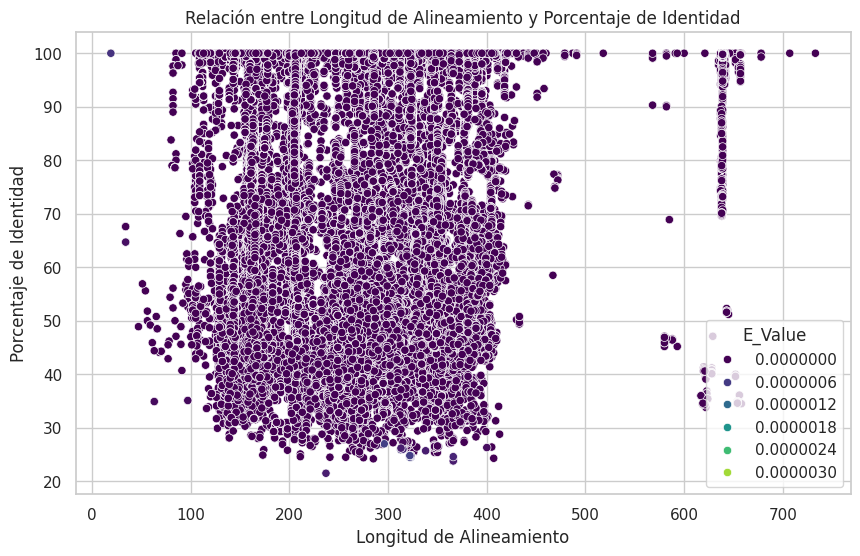

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alignment_Length', y='Perc_Identity', data=data, hue='E_Value', palette='viridis')
# sns.scatterplot(...): Utiliza la función scatterplot de la biblioteca seaborn para crear un gráfico de dispersión.
plt.title('Relación entre Longitud de Alineamiento y Porcentaje de Identidad')
plt.xlabel('Longitud de Alineamiento')
plt.ylabel('Porcentaje de Identidad')
plt.show()


#### Resumen Estadístico - para obtener un resumen estadístico de tus datos para identificar valores promedio, mínimos y máximos.

In [44]:
summary_stats = data.describe()
print(summary_stats)


       Perc_Identity  Alignment_Length    Mismatches     Gap_Opens  \
count   94769.000000      94769.000000  94769.000000  94769.000000   
mean       72.272463        279.381697     65.602127      1.112938   
std        22.158538        123.811986     57.854924      1.807044   
min        21.500000         19.000000      0.000000      0.000000   
25%        51.200000        165.000000      8.000000      0.000000   
50%        71.000000        272.000000     59.000000      0.000000   
75%        97.500000        350.000000    103.000000      2.000000   
max       100.000000        733.000000    407.000000     20.000000   

        Query_Start     Query_End  Subject_Start   Subject_End        E_Value  \
count  94769.000000  94769.000000   94769.000000  94769.000000   9.476900e+04   
mean       6.506727    283.434942      12.890608    289.799787   2.798314e-10   
std       15.942346    124.261333      40.599492    126.265369   1.561911e-08   
min        1.000000     19.000000       1.000